In [1]:
import numpy as np
import copy
import csv
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib
import random
import math
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import precision_recall_fscore_support
from sklearn.linear_model import LogisticRegression

In [2]:
def get_classwise(train_data, train_labels):
    dct = {}
    for i in range(len(train_data)):
        if train_labels[i] not in dct.keys():
            dct[train_labels[i]] = [train_data[i]]
        else:
            dct[train_labels[i]].append(train_data[i])
    return dct

def get_data(dct, ini, ky, hwmch):
    tst_dt = []
    tst_lbl = []
    tr_dt = []
    tr_lbl = []
    for i in range(len(dct[ky])):
        if i >= ini and i < (ini+hwmch):
            if i >= len(dct[ky]):
                break
            else:
                tst_dt.append(dct[ky][i])
                tst_lbl.append(ky)
        else:
            tr_dt.append(dct[ky][i])
            tr_lbl.append(ky)
    return tr_dt, tr_lbl, tst_dt, tst_lbl, ini+hwmch

def K_fold(train_data, train_label, k):
    dct = get_classwise(train_data, train_label)
    ins = []
    cont = []
    for i in range(len(dct.keys())):
        ins.append(0)
        cont.append(int(len(dct[i])/k))
    
    tr_accs, tst_accs, tr_mccs, tst_mccs, tr_ps, tst_ps, tr_rs, tst_rs, tr_f1s, tst_f1s = [],[],[],[],[],[],[],[],[],[] 
    for j in range(k):
        tr_dt = []
        tr_lbl = []
        tst_dt = []
        tst_lbl = []
        for i in dct.keys():
            tr_d, tr_l, tst_d, tst_l,upt = get_data(dct, ins[i], i, cont[i])
            tr_dt += tr_d
            tr_lbl += tr_l
            tst_dt += tst_d
            tst_lbl += tst_l
            ins[i] = upt
        
        tr_dt = np.array(tr_dt)
        tr_lbl = np.array(tr_lbl)
        tst_dt = np.array(tst_dt)
        tst_lbl = np.array(tst_lbl)
        
        #print(tr_dt.shape)
        #print(tst_dt.shape)
        
        idx = np.random.permutation(len(tr_dt))
        tr_x, tr_y = tr_dt[idx], tr_lbl[idx]
        
        idx = np.random.permutation(len(tst_dt))
        tst_x, tst_y = tst_dt[idx], tst_lbl[idx]
        
        
        
        clf = svm.SVC(kernel='linear')
        clf.fit(tr_x, tr_y)
        
        tr_sc = clf.score(tr_x, tr_y)
        tst_sc = clf.score(tst_x, tst_y)
        
        pred = clf.predict(tr_x)
        tr_mcc = matthews_corrcoef(tr_y, pred)
        prf = precision_recall_fscore_support(tr_y, pred, average='macro')
        tr_p = prf[0]
        tr_r = prf[1]
        tr_f1 = prf[2]
        
        pred = clf.predict(tst_x)
        tst_mcc = matthews_corrcoef(tst_y, pred)
        prf = precision_recall_fscore_support(tst_y, pred, average='macro')
        tst_p = prf[0]
        tst_r = prf[1]
        tst_f1 = prf[2]
        
        tr_accs.append(tr_sc)
        tst_accs.append(tst_sc)
        tr_mccs.append(tr_mcc)
        tst_mccs.append(tst_mcc)
        tr_ps.append(tr_p)
        tst_ps.append(tst_p)
        tr_rs.append(tr_r)
        tst_rs.append(tst_r)
        tr_f1s.append(tr_f1)
        tst_f1s.append(tst_f1)
        #print("Fold : ", j+1, " Train Acc : ", tr_sc, " Validation Acc : ", tst_sc)
        #print("Fold : ", j+1, " Train MCC : ", tr_mcc, " Validation MCC : ", tst_mcc)
        #print("Fold : ", j+1, " Train Precission : ", tr_p, " Validation Precission : ", tst_p)
        #print("Fold : ", j+1, " Train Recall : ", tr_r, " Validation Recall : ", tst_r)
        #print("Fold : ", j+1, " Train F1 : ", tr_f1, " Validation F1 : ", tst_f1)
        #print("-----------------------------------------------------------------------------------")
    return tr_accs,tst_accs,tr_mccs,tst_mccs,tr_ps,tst_ps,tr_rs,tst_rs,tr_f1s,tst_f1s



def K_fold2(train_data, train_label, k):
    dct = get_classwise(train_data, train_label)
    ins = []
    cont = []
    for i in range(len(dct.keys())):
        ins.append(0)
        cont.append(int(len(dct[i])/k))
    
    tr_accs, tst_accs, tr_mccs, tst_mccs, tr_ps, tst_ps, tr_rs, tst_rs, tr_f1s, tst_f1s = [],[],[],[],[],[],[],[],[],[] 
    for j in range(k):
        tr_dt = []
        tr_lbl = []
        tst_dt = []
        tst_lbl = []
        for i in dct.keys():
            tr_d, tr_l, tst_d, tst_l,upt = get_data(dct, ins[i], i, cont[i])
            tr_dt += tr_d
            tr_lbl += tr_l
            tst_dt += tst_d
            tst_lbl += tst_l
            ins[i] = upt
        
        tr_dt = np.array(tr_dt)
        tr_lbl = np.array(tr_lbl)
        tst_dt = np.array(tst_dt)
        tst_lbl = np.array(tst_lbl)
        
        #print(tr_dt.shape)
        #print(tst_dt.shape)
        
        idx = np.random.permutation(len(tr_dt))
        tr_x, tr_y = tr_dt[idx], tr_lbl[idx]
        
        idx = np.random.permutation(len(tst_dt))
        tst_x, tst_y = tst_dt[idx], tst_lbl[idx]
        
        
        
        clf = LogisticRegression(random_state=0)
        clf.fit(tr_x, tr_y)
        
        tr_sc = clf.score(tr_x, tr_y)
        tst_sc = clf.score(tst_x, tst_y)
        
        pred = clf.predict(tr_x)
        tr_mcc = matthews_corrcoef(tr_y, pred)
        prf = precision_recall_fscore_support(tr_y, pred, average='macro')
        tr_p = prf[0]
        tr_r = prf[1]
        tr_f1 = prf[2]
        
        pred = clf.predict(tst_x)
        tst_mcc = matthews_corrcoef(tst_y, pred)
        prf = precision_recall_fscore_support(tst_y, pred, average='macro')
        tst_p = prf[0]
        tst_r = prf[1]
        tst_f1 = prf[2]
        
        tr_accs.append(tr_sc)
        tst_accs.append(tst_sc)
        tr_mccs.append(tr_mcc)
        tst_mccs.append(tst_mcc)
        tr_ps.append(tr_p)
        tst_ps.append(tst_p)
        tr_rs.append(tr_r)
        tst_rs.append(tst_r)
        tr_f1s.append(tr_f1)
        tst_f1s.append(tst_f1)
        #print("Fold : ", j+1, " Train Acc : ", tr_sc, " Validation Acc : ", tst_sc)
        #print("Fold : ", j+1, " Train MCC : ", tr_mcc, " Validation MCC : ", tst_mcc)
        #print("Fold : ", j+1, " Train Precission : ", tr_p, " Validation Precission : ", tst_p)
        #print("Fold : ", j+1, " Train Recall : ", tr_r, " Validation Recall : ", tst_r)
        #print("Fold : ", j+1, " Train F1 : ", tr_f1, " Validation F1 : ", tst_f1)
        #print("-----------------------------------------------------------------------------------")
    return tr_accs,tst_accs,tr_mccs,tst_mccs,tr_ps,tst_ps,tr_rs,tst_rs,tr_f1s,tst_f1s



def print_metrics(tr_accs,tst_accs,tr_mccs,tst_mccs,tr_ps,tst_ps,tr_rs,tst_rs,tr_f1s,tst_f1s):
    print("---------------------Training-------------------------------")
    print("Accuracy : ", np.mean(tr_accs))
    print("MCC : ", np.mean(tr_mccs))
    print("Precision : ", np.mean(tr_ps))
    print("Recall : ", np.mean(tr_rs))
    print("F1 : ", np.mean(tr_f1s))
    
    print("---------------------Validation-------------------------------")
    print("Accuracy : ", np.mean(tst_accs))
    print("MCC : ", np.mean(tst_mccs))
    print("Precision : ", np.mean(tst_ps))
    print("Recall : ", np.mean(tst_rs))
    print("F1 : ", np.mean(tst_f1s))

In [3]:
data = []
with open('kirpdata.csv','rt')as f:
  dt = csv.reader(f)
  for row in dt:
        data.append(row)

In [4]:
data = data[1:]

In [5]:
data = np.array(data)

In [6]:
data = data[:,1:]

In [7]:
labels = []
with open('kirplabel.csv','rt')as f:
  dt = csv.reader(f)
  for row in dt:
        labels.append(row)

In [8]:
labels = labels[1:]

In [9]:
labels = np.array(labels)[:,1:]

In [10]:
data[0]

array(['201.3304', '4.1094', '0.5137', ..., '978.0403', '270.1939', '0'],
      dtype='<U12')

In [11]:
len(labels)

323

In [12]:
u,c = np.unique(labels , return_counts=True)

In [13]:
u

array(['0', '1'], dtype='<U3')

In [14]:
c

array([ 32, 291], dtype=int64)

# Exp 2

In [15]:
data.shape

(323, 20502)

In [16]:
labels.shape

(323, 1)

In [17]:
data = data.astype(np.float)

In [18]:
data[0]

array([2.013304e+02, 4.109400e+00, 5.137000e-01, ..., 9.780403e+02,
       2.701939e+02, 0.000000e+00])

In [19]:
labels = labels.astype(np.int)

# Now process

In [20]:
labels = labels.reshape((len(labels),))

X_train2, X_test2, y_train, y_test = train_test_split(data, labels, test_size = 0.3, stratify = labels, random_state = 3)

scaler = preprocessing.StandardScaler().fit(X_train2) 

X_train = scaler.transform(X_train2)
X_test = scaler.transform(X_test2)

In [21]:
tr_accs,tst_accs,tr_mccs,tst_mccs,tr_ps,tst_ps,tr_rs,tst_rs,tr_f1s,tst_f1s = K_fold(X_train, y_train, 6)
print_metrics(tr_accs,tst_accs,tr_mccs,tst_mccs,tr_ps,tst_ps,tr_rs,tst_rs,tr_f1s,tst_f1s)

---------------------Training-------------------------------
Accuracy :  1.0
MCC :  1.0
Precision :  1.0
Recall :  1.0
F1 :  1.0
---------------------Validation-------------------------------
Accuracy :  0.990990990990991
MCC :  0.9510648961639272
Precision :  0.9583333333333334
Recall :  0.9950980392156863
F1 :  0.9737029140014215


In [22]:
clf = svm.SVC(kernel='linear')

In [23]:
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [24]:
clf.score(X_test, y_test)

0.979381443298969

In [25]:
clf.score(X_train, y_train)

1.0

In [26]:
pca = PCA(n_components=2)

In [27]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [28]:
pca_data = pca.transform(X_train)

In [29]:
pca_data.shape

(226, 2)

In [30]:
import seaborn as sns 
import pandas as pd

In [31]:
pca_data.shape

(226, 2)

In [32]:
df = pd.DataFrame(pca_data, columns=["x", "y"])

In [33]:
df["val"] = pd.Series(y_train).apply(lambda x: "red" if x==1 else "blue")

In [34]:
len(df)

226

In [35]:
df

,x,y,val
0,-65.378526,-40.370791,blue
1,133.340115,-105.215115,red
2,-73.495226,-53.359994,blue
3,5.995797,72.091056,red
4,-13.731230,-29.622370,blue
5,13.668501,14.992950,red
6,-6.194634,-23.860307,red
7,14.927211,21.296163,red
8,-2.286923,12.884833,red
9,87.831281,39.521777,red


[]

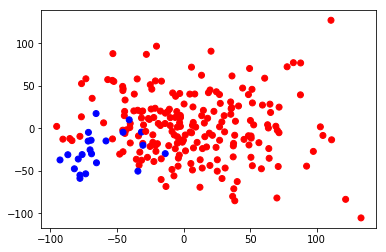

In [36]:
fig, ax = plt.subplots()
ax.scatter(x=df["x"], y=df["y"], c=df["val"])
plt.plot()

In [37]:
from sklearn.metrics import matthews_corrcoef

In [38]:
pred = clf.predict(X_test)

matthews_corrcoef(y_test, pred)

0.8885057471264368

In [39]:
pred = clf.predict(X_train)

matthews_corrcoef(y_train, pred)

1.0

In [40]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier(random_state = 3)

model.fit(X_train2,y_train)

C:\Users\Gurpreet\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=3, verbose=0, warm_start=False)

In [41]:
df = pd.DataFrame(data=X_train2[0:,0:],index=[i for i in range(X_train2.shape[0])], columns=['f'+str(i) for i in range(X_train2.shape[1])])

print(len(df))

df2 = pd.DataFrame(data=X_test2[0:,0:],index=[i for i in range(X_test2.shape[0])], columns=['f'+str(i) for i in range(X_test2.shape[1])])

print(len(df2))

226
97


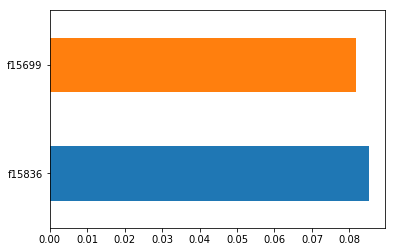

In [42]:
feat_importances = pd.Series(model.feature_importances_, index=df.columns)
feat_importances.nlargest(2).plot(kind='barh')
plt.show()

In [43]:
fi = pd.Series(model.feature_importances_, index=df.columns)

ftr = fi.nlargest(2)

print(ftr.index)

Index(['f15836', 'f15699'], dtype='object')


In [44]:
npar = []
for i in range(len(ftr.index)):
    npar.append(df[ftr.index[i]].values)

npar = np.array(npar).T

print(npar.shape)


npar2 = []
for i in range(len(ftr.index)):
    npar2.append(df2[ftr.index[i]].values)

npar2 = np.array(npar2).T

print(npar2.shape)





scaler = preprocessing.StandardScaler().fit(npar)

X_train = scaler.transform(npar)

X_test = scaler.transform(npar2)

(226, 2)
(97, 2)


In [45]:
tr_accs,tst_accs,tr_mccs,tst_mccs,tr_ps,tst_ps,tr_rs,tst_rs,tr_f1s,tst_f1s = K_fold(X_train, y_train, 6)
print_metrics(tr_accs,tst_accs,tr_mccs,tst_mccs,tr_ps,tst_ps,tr_rs,tst_rs,tr_f1s,tst_f1s)

---------------------Training-------------------------------
Accuracy :  0.9929453262786597
MCC :  0.9611241783892092
Precision :  0.9807175209264992
Recall :  0.9804953560371517
F1 :  0.9804923123199408
---------------------Validation-------------------------------
Accuracy :  0.990990990990991
MCC :  0.9429904174424563
Precision :  0.9767857142857143
Recall :  0.9697712418300654
F1 :  0.968977060865445


In [46]:
clf = svm.SVC(kernel='linear', probability = True)

clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [47]:
clf.score(X_test, y_test)

1.0

In [48]:
clf.score(X_train, y_train)

0.9911504424778761

In [49]:
pred = clf.predict(X_train)

matthews_corrcoef(y_train, pred)

0.9496434937611408

In [50]:
pred = clf.predict(X_test)

matthews_corrcoef(y_test, pred)

1.0

In [51]:
import pickle
with open('my_dict_ft.pkl', 'rb') as fp:
    dct = pickle.load(fp)

for i in range(len(ftr)):
    print(dct[ftr.index[i]])

SFRP1
SEMA3G


In [52]:
from sklearn.metrics import precision_recall_fscore_support

precision_recall_fscore_support(y_test, pred, average='macro')

(1.0, 1.0, 1.0, None)

C:\Users\Gurpreet\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


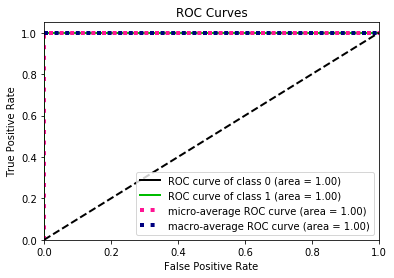

In [53]:
import scikitplot as skplt

y_probas = clf.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_test, y_probas)
plt.show()

In [54]:
tr_accs,tst_accs,tr_mccs,tst_mccs,tr_ps,tst_ps,tr_rs,tst_rs,tr_f1s,tst_f1s = K_fold2(X_train, y_train, 6)
print_metrics(tr_accs,tst_accs,tr_mccs,tst_mccs,tr_ps,tst_ps,tr_rs,tst_rs,tr_f1s,tst_f1s)

---------------------Training-------------------------------
Accuracy :  0.9955908289241622
MCC :  0.976507085062769
Precision :  0.9791666666666666
Recall :  0.9975490196078431
F1 :  0.9880871341048332
---------------------Validation-------------------------------
Accuracy :  0.9954954954954954
MCC :  0.9755324480819635
Precision :  0.9791666666666666
Recall :  0.9975490196078431
F1 :  0.9868514570007108


C:\Users\Gurpreet\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Gurpreet\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Gurpreet\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Gurpreet\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Gurpreet\AppData\Local\Continuum\anaconda3\lib\site-package

In [55]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0)

clf.fit(X_train,y_train)

prd = clf.predict(X_test)

print("Accuracy : ",clf.score(X_test, y_test))

print("MCC : ",matthews_corrcoef(y_test, prd))

prf = precision_recall_fscore_support(y_test, prd, average='macro')
print("Precission : ",prf[0])
print("Recall : ",prf[1])
print("F1 : ",prf[2])

Accuracy :  1.0
MCC :  1.0
Precission :  1.0
Recall :  1.0
F1 :  1.0


C:\Users\Gurpreet\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


C:\Users\Gurpreet\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


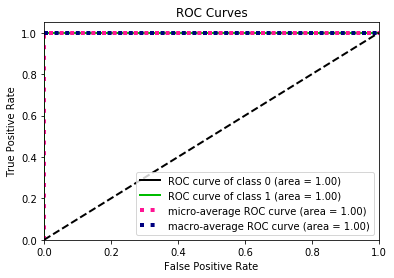

In [56]:
y_probas = clf.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_test, y_probas)
plt.show()

In [59]:
from sklearn.feature_selection import SelectKBest, chi2

skb = SelectKBest(chi2, k=2).fit(X_train2, y_train)
X_now_train = skb.transform(X_train2)
X_now_test = skb.transform(X_test2)


scaler = preprocessing.StandardScaler().fit(X_now_train)
X_now_train = scaler.transform(X_now_train)
X_now_test = scaler.transform(X_now_test)

tr_accs,tst_accs,tr_mccs,tst_mccs,tr_ps,tst_ps,tr_rs,tst_rs,tr_f1s,tst_f1s = K_fold2(X_now_train, y_train, 6)
print_metrics(tr_accs,tst_accs,tr_mccs,tst_mccs,tr_ps,tst_ps,tr_rs,tst_rs,tr_f1s,tst_f1s)

---------------------Training-------------------------------
Accuracy :  0.9858906525573192
MCC :  0.9199109404151705
Precision :  0.9922816686830666
Recall :  0.9298245614035089
F1 :  0.9582792014048728
---------------------Validation-------------------------------
Accuracy :  0.981981981981982
MCC :  0.8663897516079277
Precision :  0.9651416122004357
Recall :  0.9142156862745098
F1 :  0.9257236227824462


C:\Users\Gurpreet\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Gurpreet\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Gurpreet\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Gurpreet\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Gurpreet\AppData\Local\Continuum\anaconda3\lib\site-package

In [58]:
clf = LogisticRegression(random_state=0)

clf.fit(X_now_train,y_train)

prd = clf.predict(X_now_test)

print("Accuracy : ",clf.score(X_now_test, y_test))

print("MCC : ",matthews_corrcoef(y_test, prd))

prf = precision_recall_fscore_support(y_test, prd, average='macro')
print("Precission : ",prf[0])
print("Recall : ",prf[1])
print("F1 : ",prf[2])

Accuracy :  0.9690721649484536
MCC :  0.8225975119502045
Precission :  0.9833333333333334
Recall :  0.85
F1 :  0.9032901296111664


C:\Users\Gurpreet\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
